In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
import plotly.express as px
sns.set_style('whitegrid')
# %matplotlib inline
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv("country_vaccinations.csv")
print(df)

           country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25           8691642.0   
86508     Zimbabwe      ZWE  2022-03-26           8791728.0   
86509     Zimbabwe      ZWE  2022-03-27           8845039.0   
86510     Zimbabwe      ZWE  2022-03-28           8934360.0   
86511     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2           

In [3]:
df.drop(["source_name","source_website"], axis=1, inplace=True)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [6]:
jd= df.groupby('country').people_fully_vaccinated.max().sort_values(ascending=False)
print(jd.head(10))

country
China            1.240777e+09
India            8.282295e+08
United States    2.174990e+08
Brazil           1.602729e+08
Indonesia        1.588305e+08
Bangladesh       1.077127e+08
Pakistan         1.018812e+08
Japan            1.006337e+08
Mexico           7.971176e+07
Vietnam          7.775411e+07
Name: people_fully_vaccinated, dtype: float64


In [8]:
df.isnull().sum(axis=0)

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
dtype: int64

In [9]:
vaccines = df.loc[:,['country', 'vaccines']]
vaccines = vaccines.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()
vaccines

,vaccines,country
0,"Abdala, Johnson&Johnson, Oxford/AstraZeneca, P...",[Nicaragua]
1,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",[Vietnam]
2,"Abdala, Sinopharm/Beijing, Sinovac, Soberana02...",[Venezuela]
3,"Abdala, Soberana Plus, Soberana02",[Cuba]
4,"COVIran Barekat, Covaxin, FAKHRAVAC, Oxford/As...",[Iran]
...,...,...
79,"Pfizer/BioNTech, Sinovac, Turkovac",[Turkey]
80,"Pfizer/BioNTech, Sputnik V",[San Marino]
81,"QazVac, Sinopharm/Beijing, Sputnik V",[Kazakhstan]
82,Sinopharm/Beijing,"[Burundi, Chad, Equatorial Guinea]"


In [28]:
vaccines = df.groupby(['vaccines','date']).sum().reset_index()
vaccines_top5 = vaccines.groupby('vaccines').max()['total_vaccinations'].reset_index()
vaccines_top5 = vaccines_top5.nlargest(5, columns=['total_vaccinations'])
vaccines_top5

,vaccines,total_vaccinations
10,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",3.263129e+09
16,"Covaxin, Oxford/AstraZeneca, Sputnik V",1.834501e+09
50,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",6.198549e+08
33,"Johnson&Johnson, Moderna, Pfizer/BioNTech",5.890990e+08
20,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",4.861456e+08


In [25]:
data_reset_index = df.reset_index()
most_common_vaccine = data_reset_index.groupby(['vaccines'])['country'].count().sort_values(ascending=False).reset_index()
print('Most commonly used vaccine (combination) used worldwide is:')
display(most_common_vaccine)

Most commonly used vaccine (combination) used worldwide is:


,vaccines,country
0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",7608
1,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",6263
2,Oxford/AstraZeneca,6022
3,"Oxford/AstraZeneca, Pfizer/BioNTech",4629
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",3564
...,...,...
79,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",312
80,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",311
81,"Johnson&Johnson, Moderna",251
82,"Johnson&Johnson, Pfizer/BioNTech, Sinopharm/Be...",228


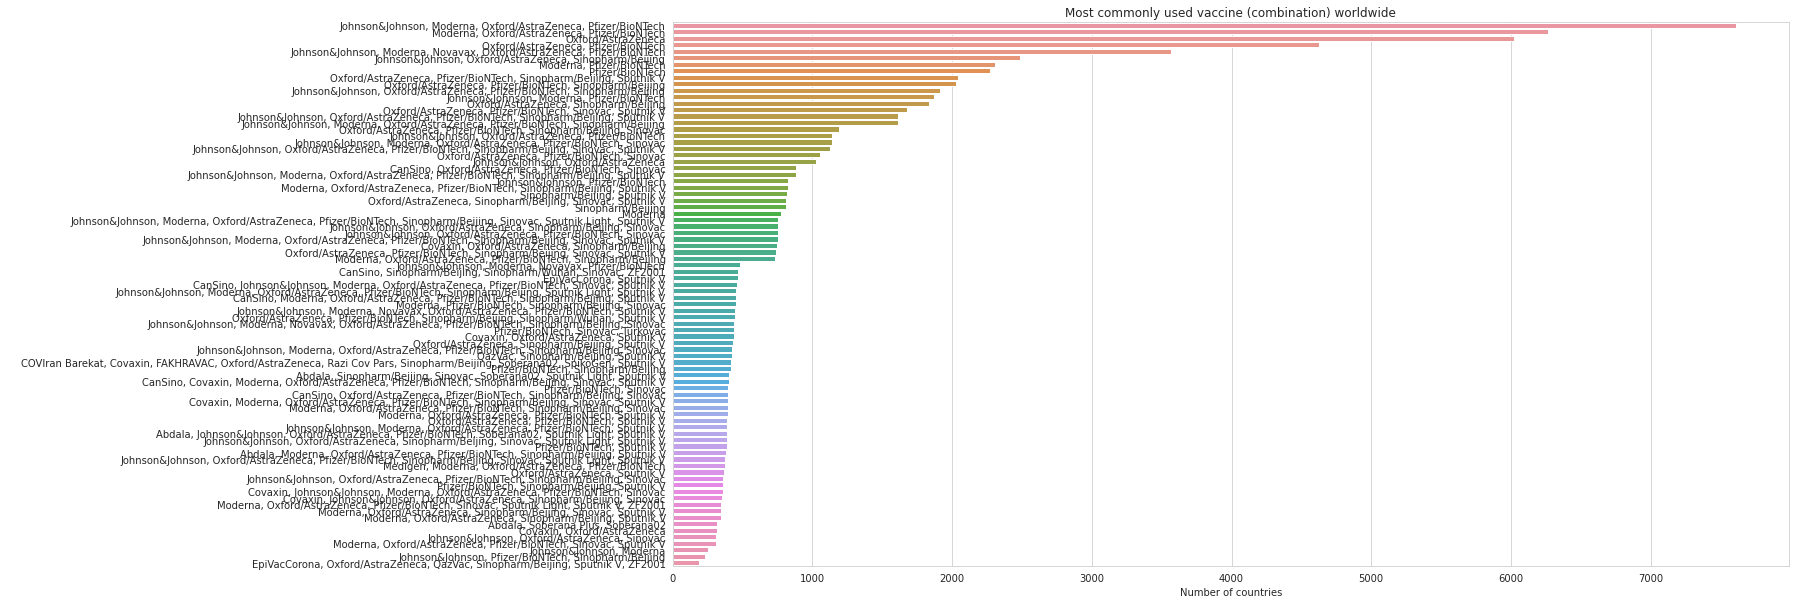

In [41]:
plt.figure(figsize=(20, 10))
plt.title('Most commonly used vaccine (combination) worldwide')
sns.barplot(y=most_common_vaccine.vaccines, x=most_common_vaccine.country)
plt.ylabel(' ')
plt.xlabel('Number of countries');

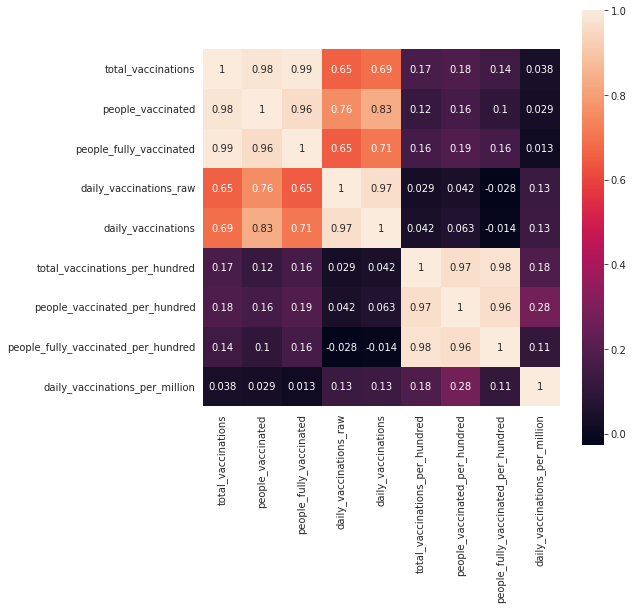

country
China            22424286.0
India            10037995.0
Bangladesh        3758404.0
United States     3506960.0
Pakistan          2175773.0
Name: daily_vaccinations, dtype: float64


In [42]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

top5=df.groupby("country").daily_vaccinations.max().sort_values(ascending=False).head(5)
print(top5)

In [63]:
lowest10=df.groupby("country").people_fully_vaccinated.sum().sort_values().head(10)
print('10 Lowest Countries Vaccinated: ', lowest10)

10 Lowest Countries Vaccinated:  country
Pitcairn                             113.0
Tokelau                              968.0
Falkland Islands                    3492.0
Niue                                3887.0
Saint Helena                        4653.0
Tuvalu                             17362.0
Bonaire Sint Eustatius and Saba    18401.0
Nauru                              41357.0
Montserrat                         41500.0
Burundi                            82190.0
Name: people_fully_vaccinated, dtype: float64
